In [3]:
import numpy as np
from base64 import b64decode
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

# Problem 1
Apply Fixed-Point Iteration to find the solution of the equation 

$$e^x+x=7$$

Iterate until the absolute difference of two successive iterates is less than $\epsilon=10^{-8}$.

(Hint: make sure you use a function $g(x)$ that theoretically works; otherwise the algorithm may diverge; the initial guess can be obtained from a plot of the function.)

### Solution 

In [4]:
# Function for fixed-point iteration 
# The stopping criterion is iterates from two successive steps are close under some tolerance
# if f(x)=0 can be written as g(x)=x

def fpi_tol(g, x_0, tol):
    """
    g: the function g(x) in g(x)=x
    x_0: the initial guess
    k: the tolerance. The algorithm stops if two successive iterates have a difference
       less than the tol
    """
    nstep = 0
    x = g(x_0)
    while (np.abs(x-x_0) > tol):
        x_0 = x
        x = g(x_0)
        nstep += 1
    
    return x, nstep

First we check the plot of the function:

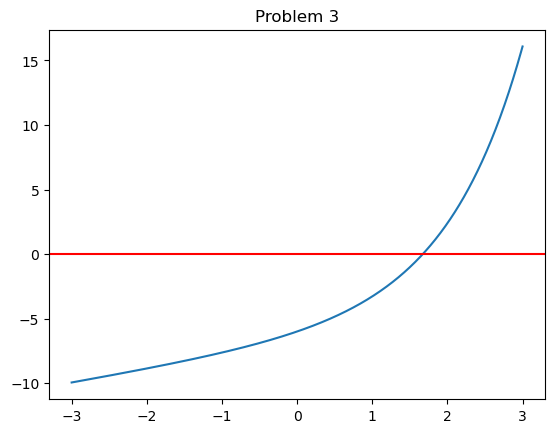

In [5]:
def f_pr4_b(x):
    return np.exp(x)+x-7.

x = np.linspace(-3,3,1000)
plt.plot(x,f_pr4_b(x))
plt.title('Problem 3')
plt.axhline(color='r');

Let the intial guess be $1$ for example. Note for
\begin{equation*}
g(x) = 7-e^x
\end{equation*}
$|g'(1.8)| > 1$. So another $g$ needs to be used.

The following $g$ function works:
\begin{equation*}
g(x) = \log{(7-x)}
\end{equation*}

In [6]:
def g_pr4_b(x):
    return np.log(7.-x)

x_0 = 1.
tol = 1e-8
sol_b, nstep = fpi_tol(g_pr4_b, x_0, tol)
print('The approx solution g(x) with |x-g(x)|<',tol,'found in',nstep,'iterations')
print(sol_b)

# Check if the solution is correct:
print('The original function f value evaluated at ', sol_b, ' is: ', f_pr4_b(sol_b))

The approx solution g(x) with |x-g(x)|< 1e-08 found in 11 iterations
1.6728216974043735
The original function f value evaluated at  1.6728216974043735  is:  -7.747838814964325e-09


# Problem 2
(2.4-1) Use the Python codes for the secant and Newton's methods to find solutions
for the equation $\sin x-e^{-x}=0$ on $0\leq x\leq1$. Set tolerance
to $10^{-4}$, and take $p_{0}=0$ in Newton, and $p_{0}=0,p_{1}=1$
in secant method. Do a visual inspection of the estimates and comment
on the convergence rates of the methods.

### Solution

In [7]:
def newton2(f, fprime, pin, eps, N):
    n = 1
    p = 0. # to ensure the value of p carries out of the while loop
    while n <= N:
        p = pin - f(pin)/fprime(pin)
        print('p is ', p, ' and the iteration is ', n)
        if f(p) == 0:
            return
        pin = p
        n += 1

In [8]:
def secant2(f, pzero, pone, eps, N):
    n = 1
    p = 0. # to ensure the value of p carries out of the while loop
    while n <= N:
        p = pone - f(pone)*(pone-pzero) / (f(pone)-f(pzero))
        print('p is ', p, ' and the iteration is ', n)
        if f(p) == 0:
            return
        pzero = pone
        pone = p
        n += 1

In [9]:
newton2(lambda x: np.sin(x)-np.exp(-x), lambda x: np.cos(x)+np.exp(-x), 
       0, 1e-4, 30)

p is  0.5  and the iteration is  1
p is  0.5856438169664325  and the iteration is  2
p is  0.5885294126263548  and the iteration is  3
p is  0.5885327439774188  and the iteration is  4
p is  0.5885327439818611  and the iteration is  5


In [10]:
secant2(lambda x: np.sin(x)-np.exp(-x), 0, 1, 1e-4, 30)

p is  0.6786141005751505  and the iteration is  1
p is  0.5690622514011432  and the iteration is  2
p is  0.5892596135984055  and the iteration is  3
p is  0.5885383580178513  and the iteration is  4
p is  0.5885327423478889  and the iteration is  5
p is  0.5885327439818647  and the iteration is  6
p is  0.5885327439818612  and the iteration is  7
p is  0.5885327439818611  and the iteration is  8


Newton's method converges much faster.

# Problem 3

Write a general $LU$ factorization code and use it to solve
$$
\left[\begin{array}{lll}{4} & {2} & {0} \\ {4} & {4} & {2} \\ {2} & {2} & {3}\end{array}\right]\left[\begin{array}{l}{x_{1}} \\ {x_{2}} \\ {x_{3}}\end{array}\right]=\left[\begin{array}{l}{2} \\ {4} \\ {6}\end{array}\right]
$$

### Solution 

In [12]:
def LU(A):
    """
    LU factorization without pivoting. 
    The coefficient matrix A is modified in place.
    The lower triangular part of A represents the L matrix, the upper triangular part 
    (including the diagonal) represents U
    A: the coefficient matrix of size n x n   
    """
    if A.shape[0] != A.shape[1]:
        print('The given coefficient matrix is not square')
        stop   
     
    # We hard code the epsilon here. It can be an input parameter.
    eps = 1e-5 
    n = A.shape[0]

    for j in range(n-1):
        if np.abs(A[j,j]) < eps:
            print('Zero pivot encountered!')
            stop
        for i in range(j+1, n):
            # The multiplier
            mp = A[i,j]/A[j,j]
            A[i,j] = mp
            for k in range(j+1,n):
                A[i,k] = A[i,k] - mp*A[j,k]
    
    # No need to return. Both A and b are changed in place
    
def forward_sub(A, b, A_from_LU):
    """
    Forward substitution
    The right hand side b is changed in place to store the solution
    A: the coefficient matrix of size n x n
    b: the right hand side of size n
    A_from_LU: True, if the matrix A is from LU factorization (diagonals are 1).
               False, if A is just a regular coefficient matrix
    """
    if A.shape[0] != A.shape[1]:
        print('The given coefficient matrix is not square')
        stop
    
    if A.shape[0] != b.size:
        print('The shape of the coefficient matrix does not match the size of the RHS')
        stop
     
    n = A.shape[0]
    
    if A_from_LU:
        for j in range(0,n):       
            b[j+1:] = b[j+1:] - A[j+1:,j]*b[j]
    else:
        for j in range(0,n):  
            b[j,j] = b[j,j]/A[j,j]
            b[j+1:] = b[j+1:] - A[j+1:,j]*b[j]

def back_sub(A, b):
    """
    Backward substitution
    The right hand side b is changed in place to store the solution
    A: the coefficient matrix of size n x n
    b: the right hand side of size n
    """
    if A.shape[0] != A.shape[1]:
        print('The given coefficient matrix is not square')
        stop
    
    if A.shape[0] != b.size:
        print('The shape of the coefficient matrix does not match the size of the RHS')
        stop
     
    n = A.shape[0]
    
    for i in range(n-1, -1, -1):
        for j in range(i+1, n):
            b[i] = b[i] - A[i,j]*b[j]
        b[i] = b[i]/A[i,i]
            

In [16]:
A = np.array([[4.,2.,0.], [4.,4.,2.], [2.,2.,3.]])
b = np.array([2.,4.,6.])
A_copy = A.copy()  # optional
b_copy = b.copy()
# Perform LU factorization
LU(A)
print('The matrix A after LU decomposition is ')
print(A)
# Perform forward substitution
forward_sub(A,b,True)
print('After forward substition, the vector b is')
print(b)
# Perform back substitution
back_sub(A,b)
print('After backward substition, the vector b is')
print(b)

The matrix A after LU decomposition is 
[[4.  2.  0. ]
 [1.  2.  2. ]
 [0.5 0.5 2. ]]
After forward substition, the vector b is
[2. 2. 4.]
After backward substition, the vector b is
[ 1. -1.  2.]


In [19]:
# test - optional
err = np.dot(A_copy,b) - b_copy
print(err)

[0. 0. 0.]


# Problem 4
Let $A$ be the $n\times n$ matrix with entries $A_{ij}=|i-j|+1$. Define $x=[1,\dots,1]^T$ and $b=Ax$. For $n=100,200,300,400$ and $500$, use the Python function numpy.linalg.solve to compute $x_c$, the double precision computed solution. For each solution, calculate the infinity norm of the forward error, find the error magnification factor, and compare with the corresponding condition numbers. Use the default norm provided by np.linalg.norm, which, for vectors, is the Euclidean norm $\|x\|=\left(\sum_{k=1}^n |x_k|^2\right)^{1/2}$.

**MATH 5660 only**: Compute the maximum error magnification factor in the vector norm provided by np.linalg.norm. Hint: Look up the description of np.linalg.norm and matrix norms to find which matrix norm of $A$ equals $\max_{x\ne 0}\frac{\|Ax\|}{\|x\|}$ for the same Euclidean vector norm as above.

### Solution

Compute $x_c$:

In [31]:
for k in range(5):
    n = (k+1)*100
    A = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            A[i,j] = np.abs((i+1)-(j+1))+1
    # True solution:
    sol_true = np.ones(n,)
    b = np.dot(A, sol_true)    
    # numerical solution
    sol = np.linalg.solve(A, b)
    
    # in infinity norm
    # forward error:
    fwd_err = np.linalg.norm(sol-sol_true, np.inf)
    # relative forward error:
    rel_fwd_err = fwd_err / np.linalg.norm(sol_true, np.inf)
    # backward error:
    back_err = np.linalg.norm(b-np.dot(A,sol), np.inf)
    # relative backward error:
    rel_back_err = back_err / np.linalg.norm(b, np.inf)
    # error magnification factor:
    err_mag_factor = rel_fwd_err / rel_back_err
    # condition number
    norm_A = np.linalg.norm(A, np.inf)
    norm_invA = np.linalg.norm(np.linalg.inv(A), np.inf)
    cond_A = norm_A * norm_invA

    
    print('For n = ', n, ' the forward error in infinity norm is ', fwd_err)
    print('For n = ', n, ' the error magnification factor in infinity norm is ', err_mag_factor)
    print('For n = ', n, ' the condition number in infinity norm is ', cond_A,'from numpy',np.linalg.cond(A,np.inf),'difference',cond_A-np.linalg.cond(A,np.inf))
    print('For n = ', n, ' the error manification factor is', err_mag_factor/cond_A,'of the condition number, in infinity norm')
    print('For n = ', n, ' the condition number in infinity norm from numpy is ', np.linalg.cond(A, np.inf)) # optional
    
    
    # in default norm
    # forward error:
    fwd_err = np.linalg.norm(sol-sol_true)
    # relative forward error:
    rel_fwd_err = fwd_err / np.linalg.norm(sol_true)
    # backward error:
    back_err = np.linalg.norm(b-np.dot(A,sol))
    # relative backward error:
    rel_back_err = back_err / np.linalg.norm(b)
    # error magnification factor:
    err_mag_factor = rel_fwd_err / rel_back_err
    # condition number
    norm_A = np.linalg.norm(A,ord=2)
    norm_invA = np.linalg.norm(np.linalg.inv(A),ord=2)
    cond_A = norm_A * norm_invA
    
    print('For n = ', n, ' the forward error in default norm is ', fwd_err)
    print('For n = ', n, ' the error magnification factor in default norm is ', err_mag_factor)
    print('For n = ', n, ' the condition number in default norm is ',cond_A,'from numpy',np.linalg.cond(A,p=2),'difference',cond_A-np.linalg.cond(A,p=2))
    print('For n = ', n, ' the error manification factor is', err_mag_factor/cond_A,'of the condition number, in default norm')
    print('For n = ', n, ' the condition number in default norm from numpy is ', np.linalg.cond(A))   # optional
    
    

For n =  100  the forward error in infinity norm is  2.531752585355207e-12
For n =  100  the error magnification factor in infinity norm is  3514.4104003906245
For n =  100  the condition number in infinity norm is  10100.000000006721 from numpy 10100.000000006721 difference 0.0
For n =  100  the error manification factor is 0.3479614257810184 of the condition number, in infinity norm
For n =  100  the condition number in infinity norm from numpy is  10100.000000006721
For n =  100  the forward error in default norm is  9.128292226590236e-12
For n =  100  the error magnification factor in default norm is  2235.521698041085
For n =  100  the condition number in default norm is  7138.87731965427 from numpy 7138.8773196543525 difference -8.276401786133647e-11
For n =  100  the error manification factor is 0.313147515770638 of the condition number, in default norm
For n =  100  the condition number in default norm from numpy is  7138.8773196543525
For n =  200  the forward error in infinit

Comparison: in all cases, the error magnification error is a substantial fraction of the condition number.

### Solution MATH 5660 additional part only

For $\|x\|$ the infinity norm, $\max_{x\ne 0}\frac{\|Ax\|}{\|x\|}$ is np.linalg.norm(A,np.inf)

For $\|x\|$ the default norm (the 2-norm), $\max_{x\ne 0}\frac{\|Ax\|}{\|x\|}$ is np.linalg.norm(A,ord=2)

The maximum error magnification factor is $\max_{\delta b\ne 0}\frac{\|A^{-1}\delta b\|}{\|\delta b\|}  \max_{x\ne 0} \frac{\|Ax\|}{\|x\|}$ (textbook, ch.3.1 Condition Number section),
which is $\|A\| \|A^{-1}\|$ already computed in the previous part: np.linalg.norm(A,ord=2)*np.linalg.norm(np.linalg.inv(A),ord=2) for the 2-norm, and np.linalg.norm(A,np.inf)*np.linalg.norm(np.linalg.inv(A),np.inf) for the infinity norm.


### Grading notes
Use of either the default norm or the infinity norm is accepted, but it should be consistent.
Computing the condition number either way, as $\|A\|\,\|A^{-1}\|$, or by np.linalg.cond, is accepted, if correct.


# Problem 5

In [33]:
def PALU(A):
    """
    PA=LU factorization with partial pivoting. 
    The coefficient matrix A is modified in place.
    The lower triangular part of A represents the L matrix, the upper triangular part 
    (including the diagonal) represents U
    A: the coefficient matrix of size n x n
    output:
    Permutation matrix $P$ is returned, along with $A$ that is changed in place
    """
    if A.shape[0] != A.shape[1]:
        print('The given coefficient matrix is not square')
        stop   
     
    # We hard code the epsilon here. It can be an input parameter.
    n = A.shape[0]
    P = np.eye(n)

    for j in range(n-1):
        print(A)
        # find p
        p = np.argmax(np.abs(A[j:,j]))        
        if p+j != j:
            # change rows p and j of A. Update P:
            A[[p+j, j]] = A[[j, p+j]]
            P[[p+j, j]] = P[[j, p+j]]   
        for i in range(j+1, n):
            # The multiplier
            mp = A[i,j]/A[j,j]
            A[i,j] = mp
            for k in range(j+1,n):
                A[i,k] = A[i,k] - mp*A[j,k]
    return P

In [35]:
A = np.array([[-9., 1, 17], [3, 2, -1], [6, 8, 1]])
print('Perform PA=LU factorization of A = : ')
print('Before PA=LU factorization, A = ')
print(A)
A_copy = A.copy()  # optional

P = PALU(A)
print('The PA=LU factorization result is ')
print('After PA=LU factorization, A = ')
print(A)
print('The permutation matrix P = ')
print(P)

Perform PA=LU factorization of A = : 
Before PA=LU factorization, A = 
[[-9.  1. 17.]
 [ 3.  2. -1.]
 [ 6.  8.  1.]]
[[-9.  1. 17.]
 [ 3.  2. -1.]
 [ 6.  8.  1.]]
[[-9.          1.         17.        ]
 [-0.33333333  2.33333333  4.66666667]
 [-0.66666667  8.66666667 12.33333333]]
The PA=LU factorization result is 
After PA=LU factorization, A = 
[[-9.          1.         17.        ]
 [-0.66666667  8.66666667 12.33333333]
 [-0.33333333  0.26923077  1.34615385]]
The permutation matrix P = 
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [36]:
# test - optional
# Extracting L and U from the modified A
U = np.triu(A)
L = A - U + np.eye(A.shape[0])
# Verifying that L*U = P*A_copy
result = np.dot(L, U) - np.dot(P, A_copy)

print("L*U - P*A_copy = ")
print(result)

L*U - P*A_copy = 
[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00 -8.8817842e-16  0.0000000e+00]
 [ 0.0000000e+00  4.4408921e-16  0.0000000e+00]]
